In [2]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split #random_state=42
from sklearn.neighbors import KNeighborsClassifier #분류/ 데이터 학습하기
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler #표준화작업 (instead of 데이터값 - 평균/ 표준편차)
from sklearn.linear_model import Ridge #릿지회귀
from scipy.special import softmax # 행 하나하나 1로 맞춤
from sklearn.linear_model import LogisticRegression #로지스틱 - 맞출 확률을 나타내는 것(1에 가깝게)
from sklearn.linear_model import SGDClassifier #경사하강법 - 머신러닝을 훈련하는 방법

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import glob,os.path,re
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
df.describe

<bound method NDFrame.describe of     Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]>

In [5]:
# 분류 7가지
df['Species'].unique()
# 종류마다 갯수 확인
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [6]:
# 한글 유무 파악(컬럼에 문자가 있는 지)
# 머신러닝을 돌릴 수가 없음
# 문자를 삭제할 것인지 문자를 코드로 변경할 것인지 확인
# 1. 문자를 아스키코드로 변경할 지(표준점수), 2. 원핫인코딩 방식으로 변경할 지
# object(str) - result, target 문자 올 수 있음(input은 안됨)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [8]:
df['Species'].head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [9]:
# str문자 타입이 존재
# 제거를 하고 나중에 타입을 df로 합칠 지
# 원핫인코딩으로 만들어서 머신러닝에 돌릴 지 판단

In [10]:
# 판다스 원핫인코딩
pd.get_dummies(df['Species'])

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,True,False
155,False,False,False,False,False,True,False
156,False,False,False,False,False,True,False
157,False,False,False,False,False,True,False


In [11]:
df_dumm = pd.get_dummies(df['Species'])
df_dumm.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [12]:
# 데이터 전처리 - data, result 분리
# 데이터 전처리 - train, test 분리
# 데이터 전처리 - 표준화 작업
# 데이터 학습
# 정답률
# 정답률 낮으면 데이터 학습 다시하기
# 다시 정답률

In [13]:
# 데이터 전처리 - data, result 분리
d_target = df['Species'].to_numpy()
d_input = df.iloc[:,1:].to_numpy()

In [14]:
# 데이터 전처리 - train, test 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    d_input,d_target,random_state=42
)

In [15]:
# 데이터 전처리 - 표준화 작업
# 타입이 numpy가 되어야 됨
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [16]:
# 데이터 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [17]:
# 정답률
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled, test_target))

0.8067226890756303
0.85


In [18]:
# 정답률 낮으면 데이터 학습 다시하기
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled, train_target)


LogisticRegression(C=20, max_iter=1000)

In [19]:
# 다시 정답률
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [20]:
# 로지스틱 회귀에 있는 분류 모델 완성(끝났음)

In [21]:
# 경사하강법 - 완성은 되었지만 머신러닝 튜닝(정답률 높이기 위해), 효율이 좋지 않을 때

sc = SGDClassifier(loss = 'log_loss',max_iter=10 ,random_state=42)
sc.fit = (train_scaled, train_target)
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [22]:
# 데이터 일부를 가져와서 훈련을 해서 target을 맞추는데 일부만 가져와서 전체적인 target을 알지 못함.
# 전체적인 target이 무엇인지 알려줘야 함.
# partial_fit: 이전 기울기, y절편을 가지고 다시 학습
sc.partial_fit(train_scaled, train_target, classes=classes)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.5294117647058824
0.65


In [23]:
# partial_fit을 반복시키면 효율이 좋아짐
train_score = []
test_score = []

for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled,test_target))

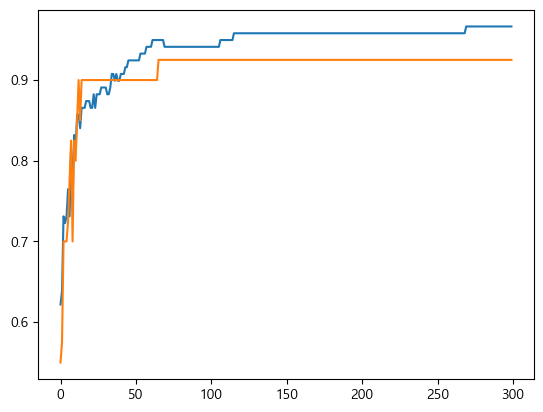

In [24]:
plt.plot(train_score)
plt.plot(test_score)

In [25]:
# tol = none -> max_iter 100으로 고정시키기(그래프를 보고 다시한번)
sc = SGDClassifier(loss = 'log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


로지스틱회귀
1. 모델 구현, 테스트
2. 경사하강법 - 완성은 되었지만 머신러닝 튜닝(정답률 높이기 위해), 효율이 좋지 않을 때
3. 데이터 일부를 가져와서 훈련을 해서 target을 맞추는데 일부만 가져와서 전체적인 target을 알지 못함. 전체적인 target이 무엇인지 알려줘야 함.
4. partial_fit을 반복시키면 효율이 좋아짐